In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.animation import FuncAnimation
from IPython import display



In [14]:
ind1=[10,15,20]
ind2=[10,15,20]
voltV=15
width1=20
width2=20
tempC=0

/tmp/ipykernel_6299/1136062539.py:73: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animALL = FuncAnimation(fig, updateALL,


NameError: name 'serialData' is not defined

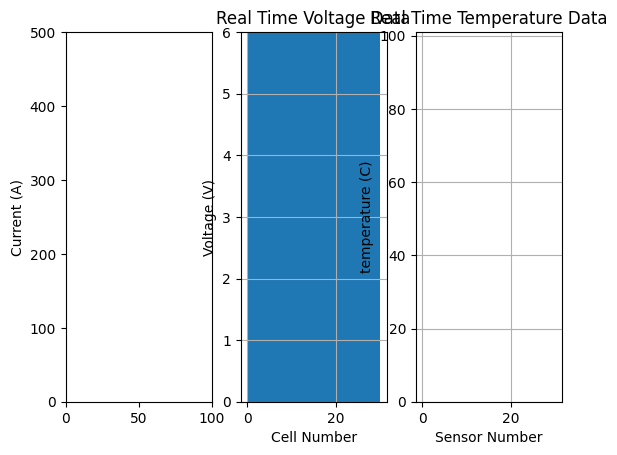

In [16]:
#figure 
fig = plt.figure(1)
# subplot for current
ax1 = fig.add_subplot(131, xlim = (0,100), ylim = (0,500))
line, = ax1.plot([],[])
ax1.set_ylabel('Current (A)')

#subplot for voltage
ax2 = fig.add_subplot(132)
rects1 = ax2.bar(ind1, voltV, width1)
ax2.grid(True)
ax2.set_ylim([0,6])
ax2.set_xlabel('Cell Number')
ax2.set_ylabel('Voltage (V)')
ax2.set_title('Real Time Voltage Data')
# ax2.set_xticks(ind1)

#subplot for temperature
ax3 = fig.add_subplot(133)
rects2 = ax3.bar(ind2, tempC, width2)
ax3.grid(True)
ax3.set_ylim([0,101])
ax3.set_xlabel('Sensor Number')
ax3.set_ylabel('temperature (C)')
ax3.set_title('Real Time Temperature Data')
# ax3.set_xticks(ind2)

def updateAmps(frameNum):

    try:
    #error check for bad serial data
        serialString = serialData.readline()
        serialLine = [float(val) for val in serialString.split()]
        print (serialLine)

        if (len(serialLine) == 5):
            voltV[int(serialLine[1])] = serialLine[2]
            tempC[int(serialLine[3])] = serialLine[4]
            currentA.append(serialLine[0])
            if (len(currentA)>100):
                currentA.popleft()

        line.set_data(range(100), currentA)

    except ValueError as e:
    #graphs not updated for bad serial data
        print (e)

    return line,

#function to update real-time voltage data
def updateVolts(frameNum):

    for rects, h in zip(rects1,voltV):
        rects.set_height(h)

    return rects1

#function to update real-time temperature data
def updateTemp(frameNum):

    for rects, h in zip(rects2,tempC):
        rects.set_height(h)

    return rects2

def updateALL(frameNum):
    a = updateAmps(frameNum)
    b = updateVolts(frameNum)
    c = updateTemp(frameNum)
    return a+b+c

animALL = FuncAnimation(fig, updateALL,
                                interval = 20, blit = True)